**Visualisation and Insights of data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
# Display the number of rows and columns
print("Shape of the dataset:", df.shape)

Shape of the dataset: (82657, 12)


In [ ]:
df.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [ ]:
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

**Observation:**

 * The columns user_name,designation, region_1, region_2 contains lots of null values and also this columns won't be useful for model building so we can drop them.

 * We will fill the null values in "price" column using mean.

 * In remaining columns, we will drop the null values.



**Data Preprocessing: Handling missing values**

In [ ]:
# Drop rows with missing values in "country" and "province" columns
df.dropna(subset=["country", "province"], inplace=True)

In [ ]:
# Drop columns with a large number of missing values
df.drop(columns=["user_name","region_1", "region_2"], inplace=True)

In [ ]:
# Fill missing values in "price" column with the mean value
df["price"].fillna(df["price"].mean(), inplace=True)

**Univariate Analysis**

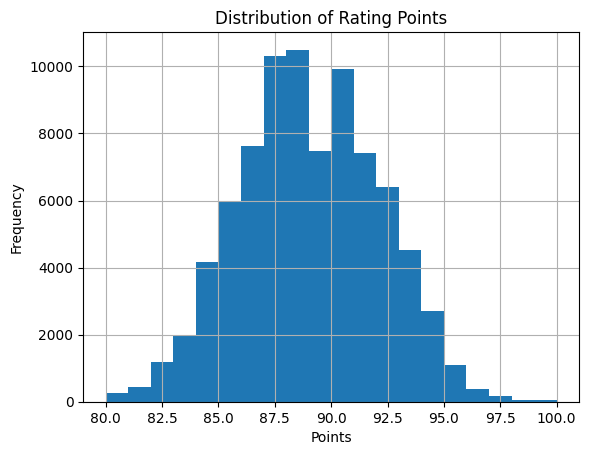

In [ ]:
# Univariate analysis for 'points' column
points_summary = df['points'].describe()
points_histogram = df['points'].hist(bins=20)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Points')
plt.show()

* The column rating "points" is normally distributed. Its ranging from 80-100.Most of the values lies between 86-91 range.

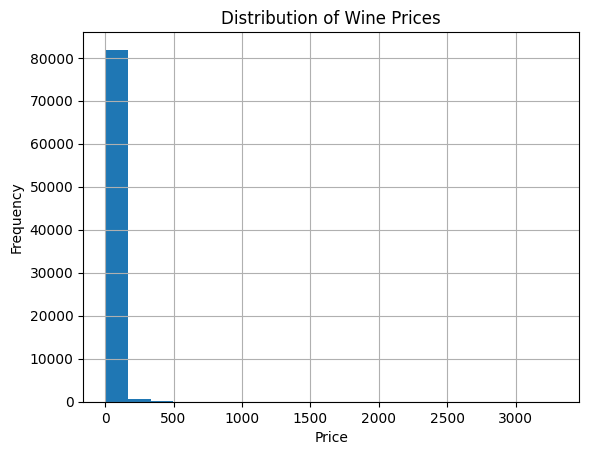

In [ ]:
# Univariate analysis for 'price' column
price_summary = df['price'].describe()
price_histogram = df['price'].hist(bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Prices')
plt.show()

* Prices are positively skewed(right skew)

In [ ]:
countries=df['country'].unique()
len(countries)

38

* There are total 38 countries listed

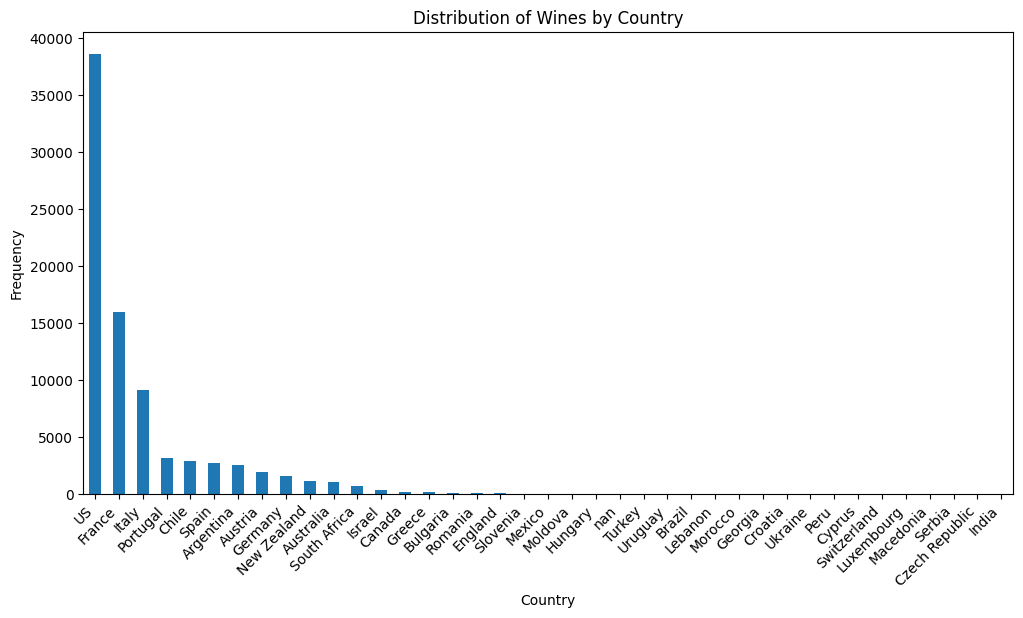

In [ ]:
# Univariate analysis for 'country' column
country_counts = df['country'].value_counts(dropna=False)
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Distribution of Wines by Country')
plt.xticks(rotation=45, ha='right')
plt.show()

* US has highest frequency of records in dataset. France is on second place.

**Bivariate Analysis**

**Top 10 wineries and their countries**

In [ ]:
# Grouping the data by 'winery' and counting the occurrences
top_winery_counts = df['winery'].value_counts().head(10)

# Extracting the top 10 wineries
top_wineries = top_winery_counts.index.tolist()

# Creating a new DataFrame to store the top 10 wineries and their countries
top_wineries_df = df[df['winery'].isin(top_wineries)][['winery', 'country']].drop_duplicates()

# Displaying the top 10 wineries and their countries
print(top_wineries_df)

                     winery   country
75            Concha y Toro     Chile
197            Louis Latour    France
218   Chateau Ste. Michelle        US
412         Williams Selyem        US
457      Wines & Winemakers  Portugal
828              Testarossa        US
991              DFJ Vinhos  Portugal
1073         Columbia Crest        US
1676        Georges Duboeuf    France
3886        Kendall-Jackson        US


**Top 5 varieties with most reviews**

In [ ]:
# Grouping the data by 'variety' and counting the occurrences
top_variety_counts = df['variety'].value_counts().head(5)

# Displaying the top 5 varieties with most reviews
print(top_variety_counts)

Pinot Noir                  10587
Chardonnay                   9403
Cabernet Sauvignon           7552
Red Blend                    7166
Bordeaux-style Red Blend     5497
Name: variety, dtype: int64


**Top 5 varieties with most points**

In [ ]:
# Grouping the data by 'variety' and calculating the average points for each variety
top_variety_points = df.groupby('variety')['points'].mean().nlargest(5)

# Displaying the top 5 varieties with most points
print(top_variety_points)

variety
Nebbiolo            90.283675
Grüner Veltliner    90.051185
Champagne Blend     89.723742
Riesling            89.465284
Pinot Noir          89.417210
Name: points, dtype: float64


**Wine varieties in ascending order of average price**

In [ ]:
# Sorting the data by 'price' in ascending order
sorted_by_price = df.sort_values(by='price', ascending=True)

# Grouping the data by 'variety' and calculating the average price for each variety
variety_avg_price = df.groupby('variety')['price'].mean()

# Sorting the unique wine varieties in ascending order based on average price
unique_varieties_sorted_by_price = variety_avg_price.sort_values(ascending=False)

# Displaying the unique wine varieties in ascending order of average price
print(unique_varieties_sorted_by_price)

variety
Champagne Blend               66.697559
Nebbiolo                      61.215476
Cabernet Sauvignon            47.749817
Pinot Noir                    47.249062
Bordeaux-style Red Blend      45.455196
Sangiovese                    44.322740
Syrah                         39.096998
Red Blend                     36.160752
Rhône-style Red Blend         35.415513
Bordeaux-style White Blend    35.303766
Cabernet Franc                35.004647
Chardonnay                    34.848547
Riesling                      32.618959
Tempranillo                   30.907719
Sparkling Blend               30.453542
Malbec                        30.425540
Merlot                        29.726586
Grüner Veltliner              29.558680
Zinfandel                     29.369719
Gewürztraminer                26.505873
Portuguese Red                26.079144
White Blend                   24.353820
Gamay                         23.753665
Pinot Gris                    23.524391
Sauvignon Blanc               20

**Bar plot for average price**

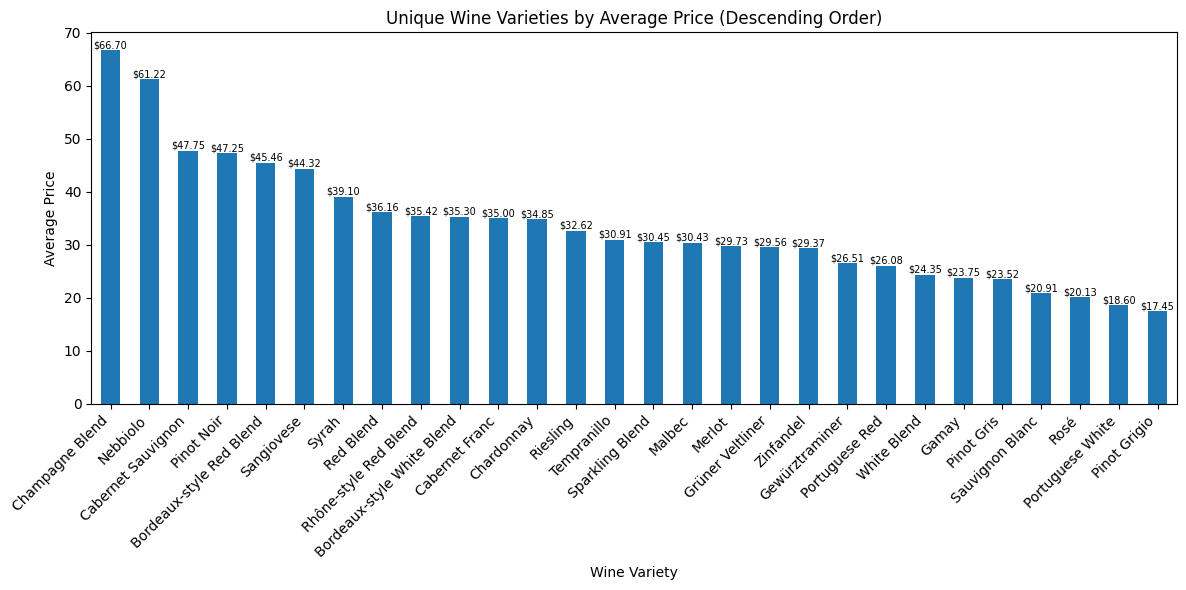

In [ ]:
# Create a bar plot to visualize the unique wine varieties in ascending order of average price
plt.figure(figsize=(12, 6))
ax=unique_varieties_sorted_by_price.plot(kind='bar')
plt.xlabel('Wine Variety')
plt.ylabel('Average Price')
plt.title('Unique Wine Varieties by Average Price (Descending Order)')
plt.xticks(rotation=45, ha='right')

# Annotating bars with the average price
for index, value in enumerate(unique_varieties_sorted_by_price):
    ax.text(index, value, f'${value:.2f}', ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()

* Champagne Blend variety has highest average prize while Pinot Grigio has lowest prize.

**Count of wineries in each country**

In [ ]:
# Grouping the data by 'country' and 'winery' and calculating the count of unique wineries in each country
winery_count_by_country = df.groupby('country')['winery'].nunique()

# Displaying the count of wineries in each country
print(winery_count_by_country.sort_values(ascending=False))

country
US                4933
France            3408
Italy             2037
Spain              855
Argentina          478
Portugal           349
Australia          322
Chile              294
New Zealand        276
Germany            216
South Africa       215
Austria            195
Greece              50
Israel              44
Canada              37
Mexico              22
Slovenia            20
Bulgaria            20
Hungary             16
England             16
Romania             15
Uruguay             13
Turkey              12
Moldova              9
Georgia              9
Croatia              9
Brazil               8
Lebanon              6
Cyprus               5
Ukraine              4
Macedonia            3
Switzerland          3
Luxembourg           2
Peru                 2
Morocco              1
India                1
Serbia               1
Czech Republic       1
Name: winery, dtype: int64


**Wine Diversity in the US and France:**

* The United States and France have the highest number of wineries, with 4,933 and 3,408 wineries, respectively.
This indicates that both countries have a rich and diverse wine industry with a large number of producers.

In [ ]:
pip install geopandas


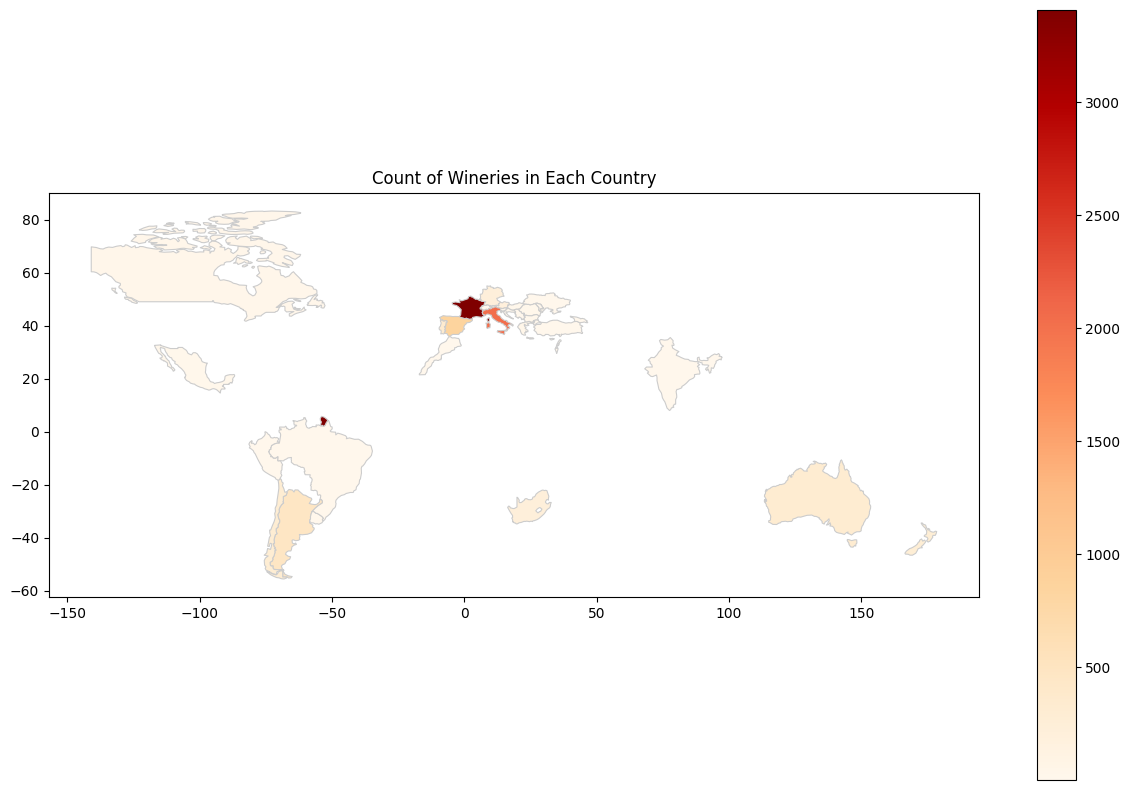

In [ ]:

import geopandas as gpd

# Grouping the data by 'country' and 'winery' and calculating the count of unique wineries in each country
winery_count_by_country = df.groupby('country')['winery'].nunique().reset_index()

# Load the world shapefile (or GeoJSON file)
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the winery counts with the world map data
merged_data = world_map.merge(winery_count_by_country, left_on='name', right_on='country', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='winery', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Count of Wineries in Each Country')
plt.show()


**Comparative Chart: Average Price and Number of Wineries (Top 7 Countries)**

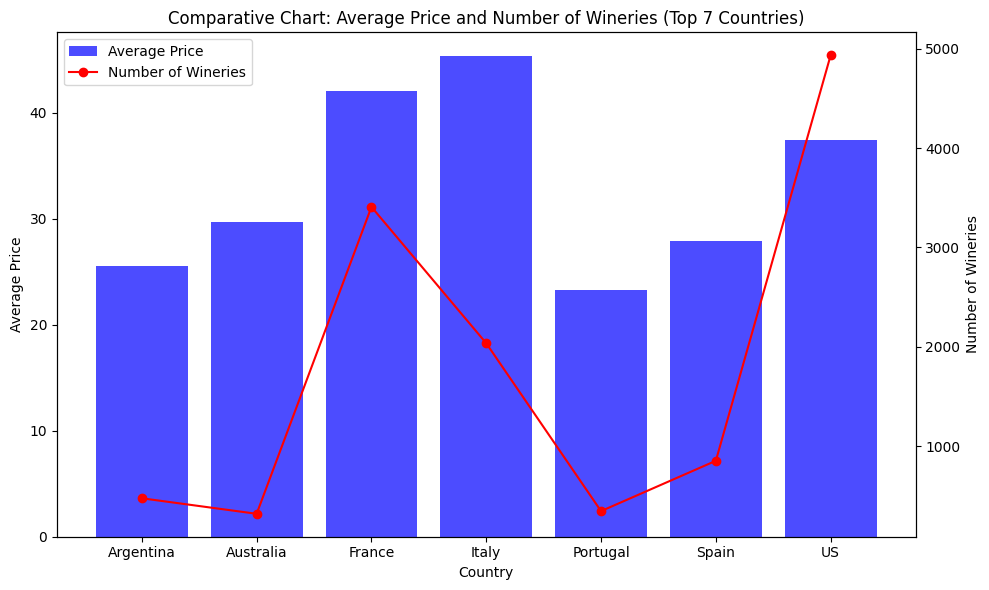

In [ ]:

# Grouping the data by 'country' and calculating the count of unique wineries in each country
winery_count_by_country = df.groupby('country')['winery'].nunique().reset_index()

# Sorting the countries based on the count of wineries in descending order and selecting the top 7 countries
top_7_countries = winery_count_by_country.nlargest(7, 'winery')

# Filter the data to include only the rows corresponding to the top 7 countries
df_top_7_countries = df[df['country'].isin(top_7_countries['country'])]

# Grouping the data by 'country' and calculating the average price and the count of wineries for each country
country_stats = df_top_7_countries.groupby('country').agg({'price': 'mean', 'winery': 'nunique'}).reset_index()

# Plotting the comparative bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for the average price
ax1.bar(country_stats['country'], country_stats['price'], color='b', alpha=0.7, label='Average Price')
ax1.set_ylabel('Average Price')
ax1.set_xlabel('Country')

# Twin y-axis for the number of wineries
ax2 = ax1.twinx()
ax2.plot(country_stats['country'], country_stats['winery'], color='r', marker='o', label='Number of Wineries')
ax2.set_ylabel('Number of Wineries')

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Comparative Chart: Average Price and Number of Wineries (Top 7 Countries)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**Average Price:**

* France has the highest average price among the top 7 countries, indicating that wines from France tend to be relatively more expensive on average compared to other countries in the selection.

**Number of Wineries:**

* The United States has the highest number of wineries among the top 7 countries, implying that it has a significant presence and diversity of wine producers compared to other countries in the selection.

**Country Comparison:**

* France stands out as a country with both a high average price and a substantial number of wineries, indicating a successful combination of quality and quantity in its wine production.

* The United States has a considerable number of wineries, but the average price is relatively lower, suggesting a focus on a broader market and a diverse range of wines catering to various price points.

* Italy also strikes a balance with a significant number of wineries and a relatively high average price, showcasing its ability to produce quality wines across various price ranges.


**Top 10 countries with the highest number of provinces having wineries**

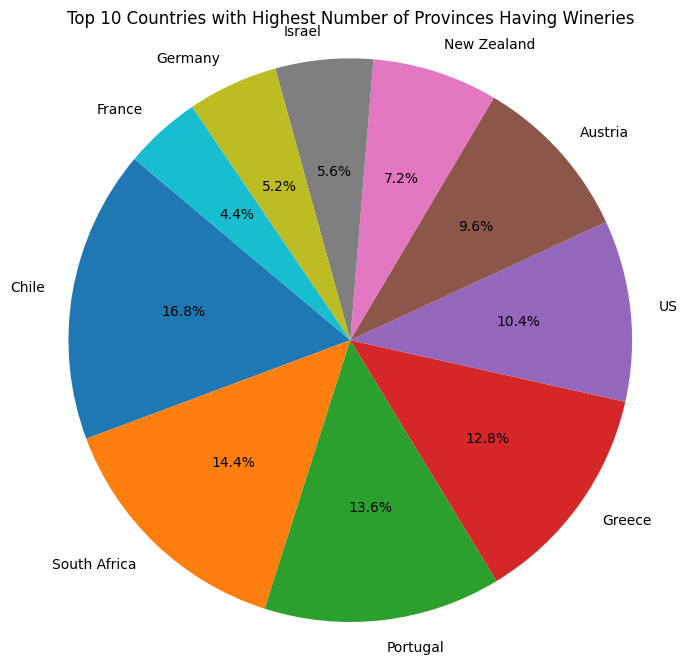

In [ ]:
# Filter the data to include rows where 'province' and 'winery' are not null
valid_provinces = df.dropna(subset=['province', 'winery'])

# Count the unique provinces for each country
province_count_by_country = valid_provinces.groupby('country')['province'].nunique().reset_index()

# Sort the countries based on the number of unique provinces in descending order
top_10_countries = province_count_by_country.nlargest(10, 'province')

# Plotting the pie chart for the top 10 countries with the highest number of provinces having wineries
plt.figure(figsize=(8, 8))
plt.pie(top_10_countries['province'], labels=top_10_countries['country'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Top 10 Countries with Highest Number of Provinces Having Wineries')
plt.show()

* Chile has highest number of Provices having winery. South Africa holds second position in the list.

**top 10 wineries with the highest number of points**

In [ ]:
# Grouping the data by 'winery' and calculating the sum of points for each winery
winery_points_sum = df.groupby(['winery', 'country'])['points'].sum().reset_index()

# Sorting the wineries based on the sum of points in descending order
top_10_wineries = winery_points_sum.nlargest(10, 'points')

# Displaying the top 10 wineries with the highest number of points
print("Top 10 Wineries with Highest Number of Points:")
print(top_10_wineries)

Top 10 Wineries with Highest Number of Points:
                      winery   country  points
12496             Testarossa        US   15887
13661        Williams Selyem        US   15345
8573            Louis Latour    France   15209
2323   Chateau Ste. Michelle        US   14436
6579         Georges Duboeuf    France   14251
13702     Wines & Winemakers  Portugal   12408
4566              DFJ Vinhos  Portugal   11314
4262          Columbia Crest        US    9865
4285           Concha y Toro     Chile    9810
8670                  Lynmar        US    9109


**American Dominance:**

* The United States is well-represented in the top 10 list, with 4 out of the 10 wineries being from the US.
This suggests that American wineries are producing high-quality wines that have received significant acclaim and recognition.

**Worst 5 wineries with the lowest number of points and their countries**

In [ ]:
# Grouping the data by 'winery' and 'country' and calculating the sum of points for each winery
winery_points = df.groupby(['winery', 'country'])['points'].sum().reset_index()

# Sorting the wineries in ascending order based on total points (to find the worst wineries)
worst_5_wineries = winery_points.nsmallest(5, 'points')

# Displaying the worst 5 wineries with the lowest number of points and their countries
print("Worst 5 Wineries with Lowest Number of Points:")
print(worst_5_wineries[['winery', 'country', 'points']])

Worst 5 Wineries with Lowest Number of Points:
                winery    country  points
486   Antonio Gonzalez  Argentina      80
810          Baroncini      Italy      80
1066         Black Box      Chile      80
1298         BookCliff         US      80
1533      Buzzard Tree         US      80


**Low Ratings:**

* All five wineries on the list have received the same low rating of 80 points.

* This indicates that these wineries might have faced challenges in delivering wines that received higher ratings and positive reviews.

* These wineries may need to focus on improving their wine quality, marketing strategies, or distribution channels to enhance their reputation.

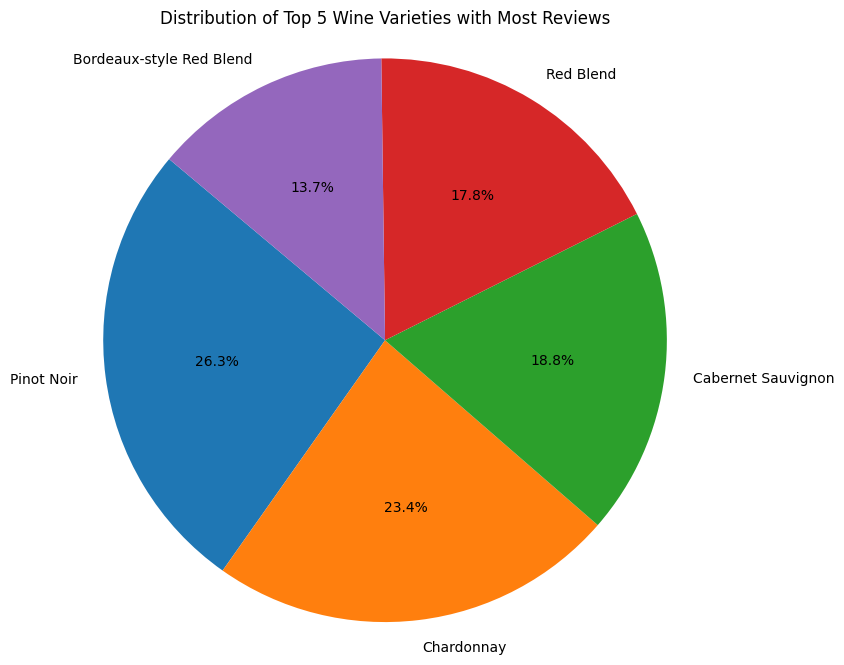

In [ ]:
# Grouping the data by 'variety' and calculating the count of reviews for each wine variety
top_variety_counts = df['variety'].value_counts().head(5)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_variety_counts, labels=top_variety_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

plt.title('Distribution of Top 5 Wine Varieties with Most Reviews')
plt.show()

**Top 5 Wine Varieties:**

* The pie chart displays the distribution of reviews for the top 5 wine varieties with the most reviews in the dataset.

**Popularity of Varieties:**

* The variety Pinot Noir shares highest percentage(26.3%) of reviews in dataset, indicating its popularity or prevalence in the dataset.



**Countries along with their average prices and price groups**

In [ ]:
# Calculate the average price for each country
average_price_by_country = df.groupby('country')['price'].mean().reset_index()

# Define the price groups
cheap_threshold = 20
expensive_threshold = 50

# Function to categorize countries into groups based on average price
def categorize_price_group(avg_price):
    if avg_price <= cheap_threshold:
        return 'Cheap'
    elif avg_price <= expensive_threshold:
        return 'Medium'
    else:
        return 'Expensive'

# Add a new column to the average_price_by_country DataFrame to indicate the price group
average_price_by_country['Price Group'] = average_price_by_country['price'].apply(categorize_price_group)

# Displaying the countries along with their average prices and price groups
print(average_price_by_country[['country', 'price', 'Price Group']])


           country       price Price Group
0        Argentina   25.546924      Medium
1        Australia   29.641436      Medium
2          Austria   32.494821      Medium
3           Brazil   24.703870      Medium
4         Bulgaria   15.193548       Cheap
5           Canada   33.873757      Medium
6            Chile   21.026148      Medium
7          Croatia   27.237849      Medium
8           Cyprus   15.166667       Cheap
9   Czech Republic   15.333333       Cheap
10         England   49.817877      Medium
11          France   42.059142      Medium
12         Georgia   12.916667       Cheap
13         Germany   43.485809      Medium
14          Greece   23.632045      Medium
15         Hungary   29.028571      Medium
16           India   12.000000       Cheap
17          Israel   33.166244      Medium
18           Italy   45.310801      Medium
19         Lebanon   31.214286      Medium
20      Luxembourg   23.600000      Medium
21       Macedonia   15.000000       Cheap
22         

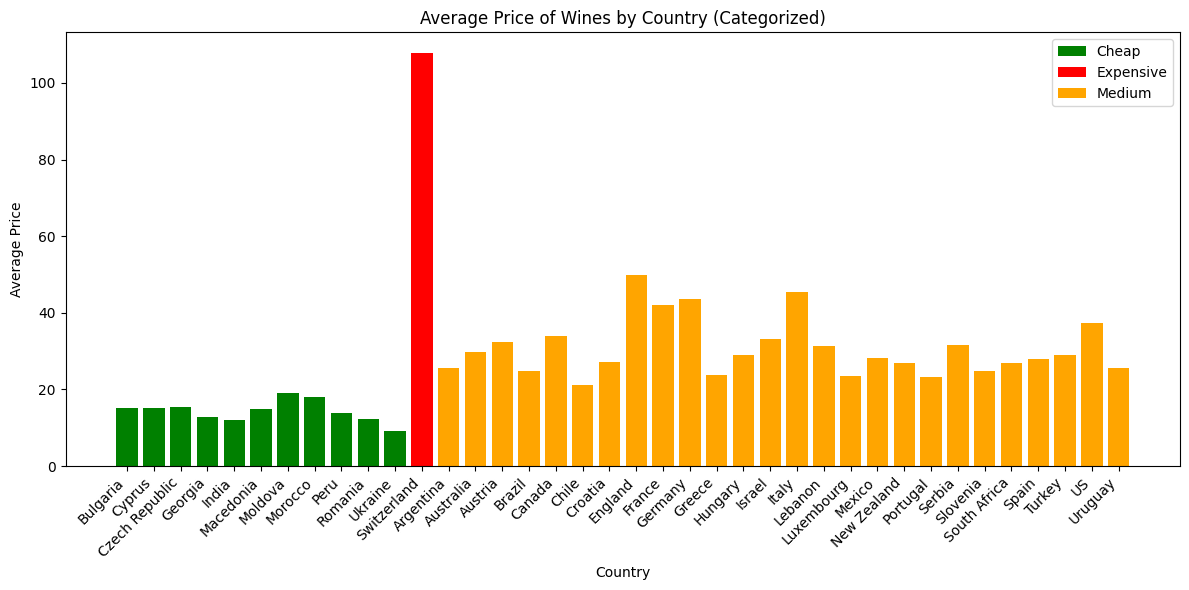

In [ ]:
# Creating a bar plot to visualize average prices and price groups by country
plt.figure(figsize=(12, 6))
colors = {'Cheap': 'green', 'Medium': 'orange', 'Expensive': 'red'}
for price_group, group_data in average_price_by_country.groupby('Price Group'):
    plt.bar(group_data['country'], group_data['price'], color=colors[price_group], label=price_group)

plt.xlabel('Country')
plt.ylabel('Average Price')
plt.title('Average Price of Wines by Country (Categorized)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Price Group Distribution:**

* The data categorizes countries into three price groups based on the average price of wines: 'Cheap', 'Medium', and 'Expensive'.

* Most countries fall into the 'Medium' price group, indicating that wines in these countries have an average price that falls between the lower-priced 'Cheap' wines and higher-priced 'Expensive' wines.

**Price Range:**

* The 'Cheap' price group includes countries like Bulgaria, Cyprus, Czech Republic, Georgia, India, Macedonia, Moldova, Morocco, Peru, Romania, and Ukraine.

* The 'Medium' price group includes a diverse set of countries, such as Argentina, Australia, Austria, Brazil, Canada, Chile, Croatia, England, France, Germany, Greece, Hungary, Israel, Italy, Lebanon, Luxembourg, Mexico, New Zealand, Portugal, Serbia, Slovenia, South Africa, Spain, Turkey, Uruguay, and the US.

* The 'Expensive' price group is represented by Switzerland, indicating that wines from Switzerland have a significantly higher average price compared to wines from other countries in the dataset.

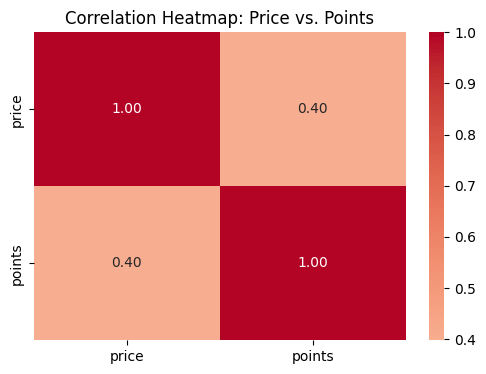

In [ ]:
# Selecting the "price" and "points" columns for correlation analysis
price_points_corr = df[['price', 'points']]

# Calculating the correlation matrix
correlation_matrix = price_points_corr.corr()

# Creating a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap: Price vs. Points')
plt.show()

**Positive Correlation:**

* The correlation coefficient between 'points' and 'price' is 0.40.

* This positive correlation value indicates that there is a moderate positive relationship between the 'points' (ratings) and 'price' variables.

* In general, wines with higher points tend to have higher prices, while wines with lower points tend to have lower prices.

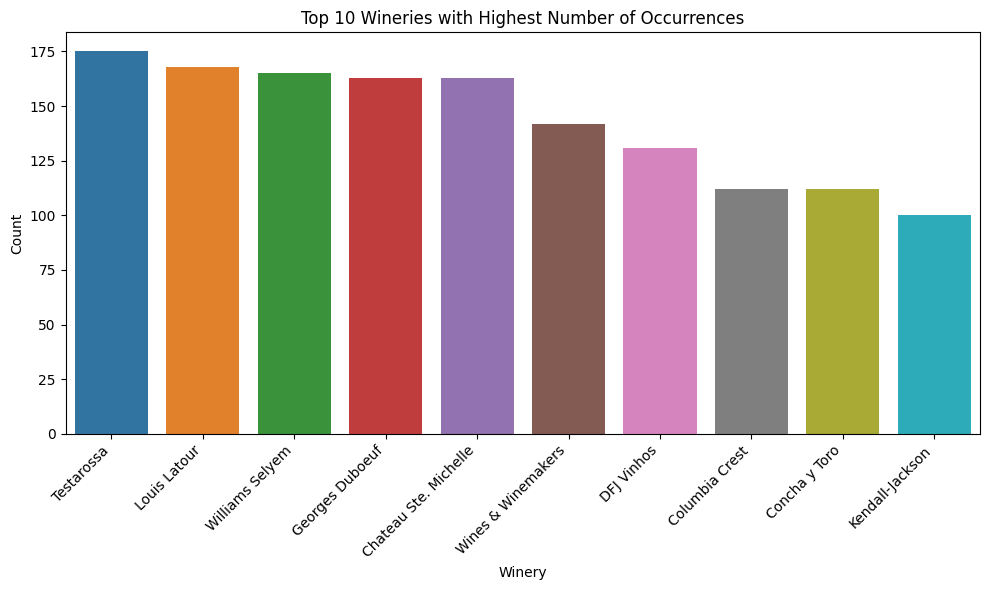

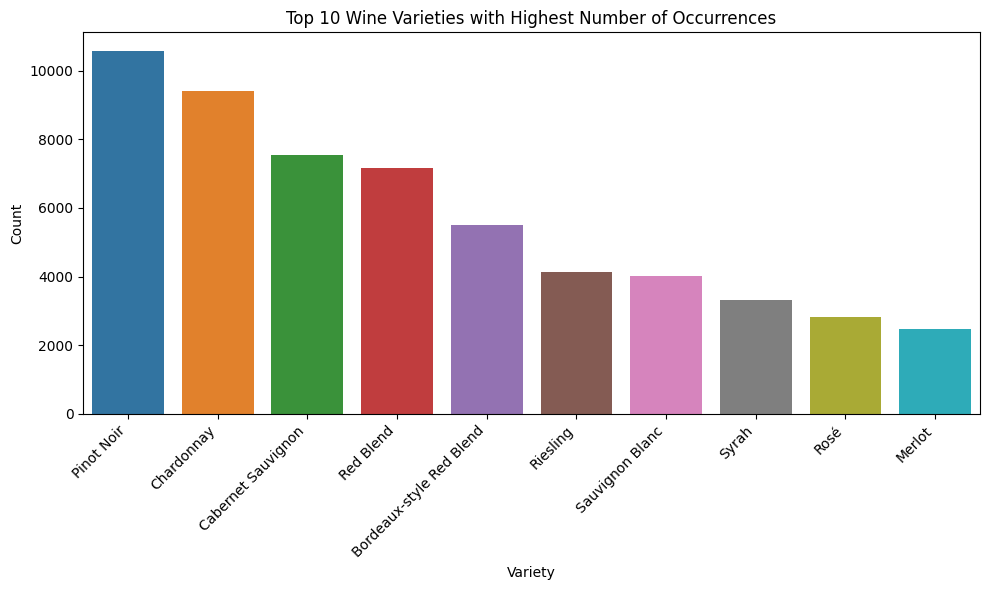

In [ ]:
# Plotting the countplot for winery and variety
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='winery', order=df['winery'].value_counts().nlargest(10).index)
plt.xlabel('Winery')
plt.ylabel('Count')
plt.title('Top 10 Wineries with Highest Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='variety', order=df['variety'].value_counts().nlargest(10).index)
plt.xlabel('Variety')
plt.ylabel('Count')
plt.title('Top 10 Wine Varieties with Highest Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Distribution of Wine Varieties in the Winery with Most Points**

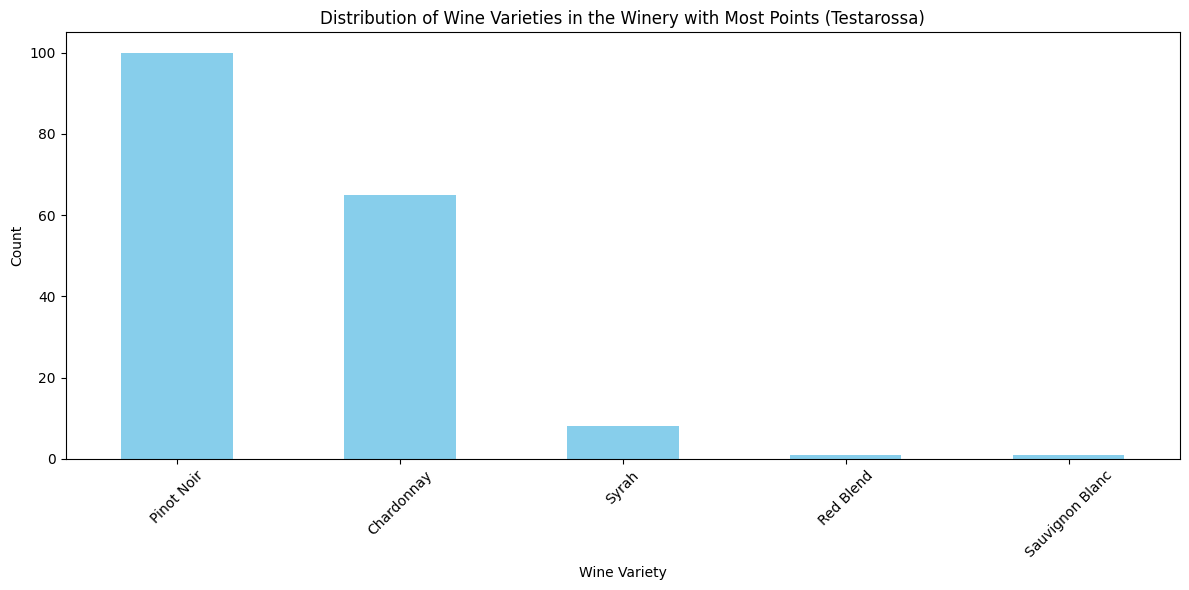

In [ ]:
# Finding the winery with the highest number of points
winery_with_most_points = df.groupby('winery')['points'].sum().idxmax()

# Filtering the data to include only wines from the winery with the most points
most_points_winery_data = df[df['winery'] == winery_with_most_points]

# Creating a bar plot to visualize the distribution of each wine variety within the winery with most points
plt.figure(figsize=(12, 6))
most_points_winery_data['variety'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Wine Variety')
plt.ylabel('Count')
plt.title(f'Distribution of Wine Varieties in the Winery with Most Points ({winery_with_most_points})')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 5 most commonly reviewed wine varieties**

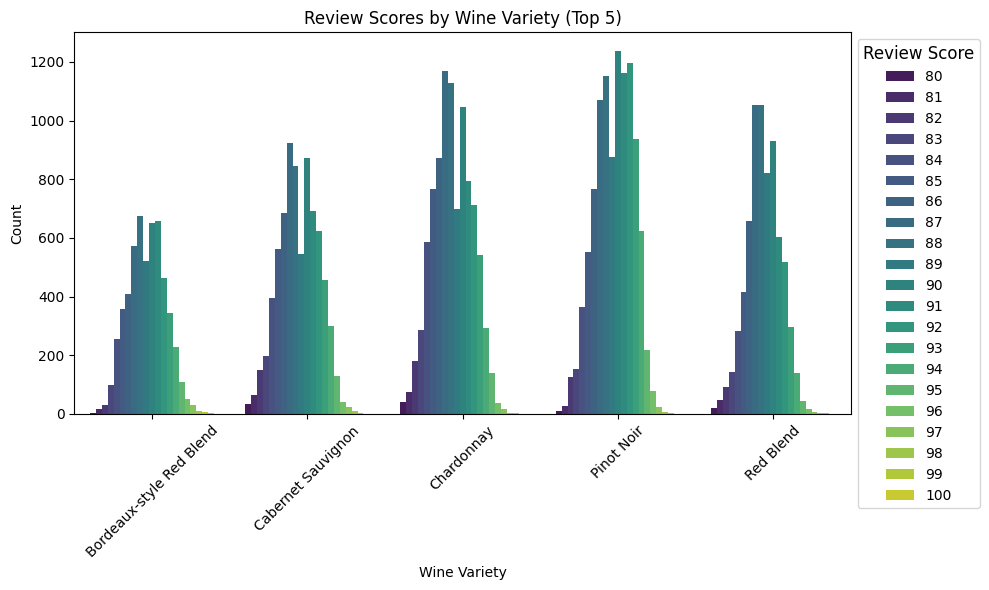

In [ ]:
# Finding the top 5 most commonly reviewed wine varieties
top_5_varieties = df['variety'].value_counts().head(5).index.tolist()

# Filtering the data for the top 5 varieties
top_5_varieties_data = df[df['variety'].isin(top_5_varieties)]

# Grouping the data by 'variety' and 'points' to calculate the count of each possible review score
wine_counts = top_5_varieties_data.groupby(['variety', 'points']).size().reset_index(name='count')

# Creating the stacked plot
plt.figure(figsize=(10, 6))
sns.barplot(x='variety', y='count', hue='points', data=wine_counts, palette='viridis')
plt.xlabel('Wine Variety')
plt.ylabel('Count')
plt.title('Review Scores by Wine Variety (Top 5)')
plt.xticks(rotation=45)
plt.legend(title='Review Score', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**Analysis regarding India**

In [ ]:
# Filter the data for wines from India
indian_wines = df[df['country'] == 'India']

# Find the most famous variety in India (variety with the highest number of reviews)
most_famous_variety = indian_wines['variety'].value_counts().idxmax()

print("The most famous wine variety in India is:", most_famous_variety)

The most famous wine variety in India is: Sauvignon Blanc


In [ ]:
# Filter the data for wines from India
indian_wines = df[df['country'] == 'India']

# Grouping the data by 'province' and calculating the count of unique wineries in each province
winery_count_by_province = indian_wines.groupby('province')['winery'].nunique()

# Displaying the number of wineries in India with their respective provinces
print(winery_count_by_province)

province
Nashik    1
Name: winery, dtype: int64


In [ ]:
# Filter the data for wines from India
indian_wines = df[df['country'] == 'India']

# Calculate the average price of wines in India
average_price_in_india = indian_wines['price'].mean()

print("Average price of wines in India:", average_price_in_india)

Average price of wines in India: 12.0
